# Generate synthetic training data

## Tasks

Possible Trello cards for the Text Transcription feature:
- Find free fonts for (children’s) handwriting
- Write a Python script to take a string of text and render an image using a handwriting font
- Research how to fine-tune Tesseract for OCR with children’s handwriting (Plan A)
- Research how to fine-tune TensorFlow computer vision models for OCR with children’s handwriting (Plan B)


    

## Find free fonts for (children’s) handwriting

I found this tutorial: https://www.haptik.ai/tech/putting-text-on-image-using-python/


It says, 

> For creating ImageFont objects we also need font(ttf, otf) files. You can use any font of your choice, here I’ll be using the  [Roboto](https://fonts.google.com/specimen/Roboto)  font which can be downloaded from the  [Google Fonts GitHub repo](https://github.com/google/fonts/tree/master/apache/roboto) . 

It looks like Google Fonts has a handwriting category: https://fonts.google.com/?category=Handwriting

Here's a handwriting font called "Indie Flower" https://fonts.google.com/specimen/Indie+Flower

I found it in the Google Fonts GitHub repo: https://github.com/google/fonts/tree/master/ofl/indieflower

It can be downloaded with this link: https://github.com/google/fonts/blob/master/ofl/indieflower/IndieFlower-Regular.ttf?raw=true

This command **get**s the URL from the **w**eb (`wget`) and saves the **o**utput (`-O`) to the filename `IndieFlower-Regular.ttf` (in the temporary cloud storage for this Colab notebook)

In [12]:
import wget

In [14]:
!wget https://github.com/google/fonts/blob/master/ofl/indieflower/IndieFlower-Regular.ttf?raw=true -O IndieFlower-Regular.ttf

zsh:1: no matches found: https://github.com/google/fonts/blob/master/ofl/indieflower/IndieFlower-Regular.ttf?raw=true


In [20]:
!pip install patool

     |████████████████████████████████| 77 kB 3.5 MB/s eta 0:00:011


In [21]:
import patoolib

In [25]:
patoolib.extract_archive('./fonts/pizza-is-my-favorite.zip',outdir='./fonts/')

patool: Extracting ./fonts/pizza-is-my-favorite.zip ...
patool: ... ./fonts/pizza-is-my-favorite.zip extracted to `./fonts/'.


'./fonts/'

In [29]:
patoolib.extract_archive('./fonts/acki-preschool.zip',outdir='./fonts/')
patoolib.extract_archive('./fonts/bpchildlefty.zip',outdir='./fonts/')
patoolib.extract_archive('./fonts/schoolbell.zip',outdir='./fonts/')
patoolib.extract_archive('./fonts/tommys-first-alphabet.zip',outdir='./fonts/')
patoolib.extract_archive('./fonts/acki-preschool.zip',outdir='./fonts/')
patoolib.extract_archive('./fonts/two-turtle-doves.zip',outdir='./fonts/')

patool: Extracting ./fonts/acki-preschool.zip ...
patool: ... ./fonts/acki-preschool.zip extracted to `./fonts/'.
patool: Extracting ./fonts/bpchildlefty.zip ...
patool: ... ./fonts/bpchildlefty.zip extracted to `./fonts/'.
patool: Extracting ./fonts/schoolbell.zip ...
patool: ... ./fonts/schoolbell.zip extracted to `./fonts/'.
patool: Extracting ./fonts/tommys-first-alphabet.zip ...
patool: ... ./fonts/tommys-first-alphabet.zip extracted to `./fonts/'.
patool: Extracting ./fonts/acki-preschool.zip ...
patool: ... ./fonts/acki-preschool.zip extracted to `./fonts/'.
patool: Extracting ./fonts/two-turtle-doves.zip ...
patool: ... ./fonts/two-turtle-doves.zip extracted to `./fonts/'.


'./fonts/'

## Write a Python script to take a string of text and render an image using a handwriting font



I googled for tutorials and it seems like there's a Python library called Pillow for working with images, including adding text to images with fonts.

Based on some tutorials, here's a working example using the font we downloaded.

In [3]:
import PIL

In [4]:
# Based on https://code-maven.com/create-images-with-python-pil-pillow

# Draw a simple image with one color

from PIL import Image
 
img = Image.new('RGB', (600, 300), color = 'lightgrey')

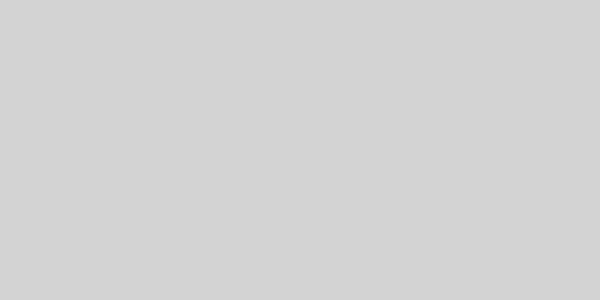

In [5]:
img

In [6]:
# Based on https://www.haptik.ai/tech/putting-text-on-image-using-python/

# import required classes
 
from PIL import Image, ImageDraw, ImageFont
 
 
# initialise the drawing context with
# the image object as background
 
draw = ImageDraw.Draw(img)


# create font object with the font file and specify
# desired size


font = ImageFont.truetype('./fonts/kimberly-geswein_pizza-is-my-favorite/PizzaismyFAVORITE.ttf', size=45)
 
# starting position of the message
 
(x, y) = (50, 50)
message = 'Happy Birthday!'
color = 'rgb(0, 0, 0)' # black color
 
# draw the message on the background
 
draw.text((x, y), message, fill=color, font=font)

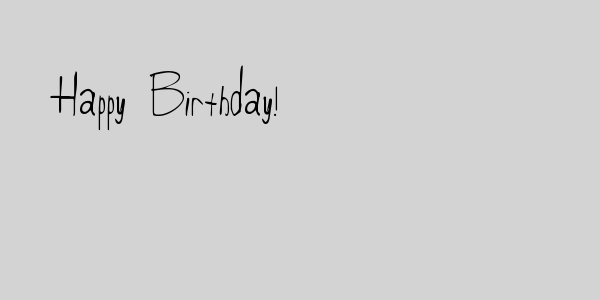

In [7]:
img

# Turning the above concept into a function that can create arbitrarily many samples

In [8]:
import random

In [9]:
import textwrap

In [10]:
# TODO: Find more children's handwriting fonts to increase variety

fonts = ['./fonts/kimberly-geswein_pizza-is-my-favorite/PizzaismyFAVORITE.ttf',
        './fonts/AckiPreschool.ttf',
        './fonts/BPchildLefty.ttf',
        './fonts/doves.ttf',
        './fonts/Schoolbell.ttf',
        './fonts/tommys.ttf']

In [100]:
# A function that automatically generates n handwritten story samples

def create_synth_samples(n):

    for i in range(n):
        # Randomly choose a story from scraped stories
        # Stories are scraped using this script: 
        # https://github.com/EEdwardsA/data-mining-script-for-ao3
        
        s = random.randint(0, 200)
        story = open(f'./stories/story{s}.txt')
        
        # Turns story into string object
        text = story.read()
        
        # Randomly assign width
        width = random.randint(500, 900)
        width_scaler = random.randint(16,20)
        font_size = int((width)/width_scaler)
        height = int((len(text)*font_size)/25)
        
        # Possible colors of "paper"
        colors = ['lightgrey', 'grey', 'yellow', 'white']
        
        # "Pencil" darkness
        c = random.randint(0, 96)
                 
        img = Image.new('RGB', (width, height), color = random.choice(colors))
        draw = ImageDraw.Draw(img)

        # Create font object with a font file and specify
        # desired size

        font = ImageFont.truetype(random.choice(fonts), size=font_size)

        # Starting position of story is fixed

        (x, y) = (50, 50) 
        
        color = f'rgb({c}, {c}, {c})' # Grayscale colors to imitate pencil

        # Draw the message on the background

        draw.text((x, y), "\n".join(textwrap.wrap(text, 
                                                  width=int(width/width_scaler)) 
                                                #width=int(6*width/font_size)
                                                 ), 
                                    fill=color, font=font)
        
        img.save(f'./synth_images/img{i}','jpeg')


In [101]:
create_synth_samples(5)